In [25]:
import pickle
import os
import pandas as pd
import enum
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from spear.labeling import PreLabels
import numpy as np
from spear.cage import Cage
from utils import custom_dataset, train_all_LF
from generate_LF import get_variables
from spear.labeling import labeling_function, ABSTAIN, preprocessor, continuous_scorer
import re

In [26]:
# pip install decile-spear==1.0.6

Declarning Class Labels


In [27]:
ABSTAIN = None

class ClassLabels(enum.Enum):
    CLASS1 = 0
    CLASS2 = 1
    CLASS3 = 2

LF class 0

In [28]:
from spear.labeling import labeling_function, ABSTAIN, preprocessor, continuous_scorer
import re
path = "D://project//data//models//"

# SVM
@continuous_scorer()
def svm_0(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten() # x is 28x28x3 input img
    svm = pickle.load(open(path+'0_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])
    # print(confidence_scores)
    return float(confidence_scores[0][1]) #only called when model doesn't ABSTAIN, output confidence on class label

@labeling_function(cont_scorer=svm_0, label=ClassLabels.CLASS1)
def LF_svm_0(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    svm = pickle.load(open(path+'0_svm.pkl','rb'))

    if svm.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS1 # Return label only if confidence > 0.8
    else:
        return ABSTAIN

# Random Forest
@continuous_scorer()
def rf_0(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    rf = pickle.load(open(path+'0_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])

    return float(confidence_scores[0][1])

@labeling_function(cont_scorer=rf_0, label=ClassLabels.CLASS1)
def LF_rf_0(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    rf = pickle.load(open(path+'0_rf.pkl','rb'))

    if rf.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS1
    else:
        return ABSTAIN

# KNN
@continuous_scorer()
def knn_0(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    knn = pickle.load(open(path+'0_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])

    return float(confidence_scores[0][1])


@labeling_function(cont_scorer=knn_0, label=ClassLabels.CLASS1)
def LF_knn_0(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    knn = pickle.load(open(path+'0_knn.pkl','rb'))

    if knn.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS1
    else:
        return ABSTAIN

# Decision Tree
@continuous_scorer()
def dt_0(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    dt = pickle.load(open(path+'0_dtc.pkl','rb'))
    confidence_scores = dt.predict_proba([x])

    return float(confidence_scores[0][1])

@labeling_function(cont_scorer=dt_0, label=ClassLabels.CLASS1)
def LF_dt_0(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    dt = pickle.load(open(path+'0_dtc.pkl','rb'))

    if dt.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS1
    else:
        return ABSTAIN

# Logistic Regression
@continuous_scorer()
def lr_0(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    lr = pickle.load(open(path+'0_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])

    return float(confidence_scores[0][1])

@labeling_function(cont_scorer=lr_0, label=ClassLabels.CLASS1)
def LF_lr_0(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    lr = pickle.load(open(path+'0_lr.pkl','rb'))

    if lr.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS1
    else:
        return ABSTAIN


LF class 1

In [29]:
# SVM
@continuous_scorer()
def svm_1(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten() # x is 28x28x3 input img
    svm = pickle.load(open(path+'1_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])

    return float(confidence_scores[0][1]) #only called when model doesn't ABSTAIN, output confidence on class label

@labeling_function(cont_scorer=svm_1, label=ClassLabels.CLASS2)
def LF_svm_1(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    svm = pickle.load(open(path+'1_svm.pkl','rb'))

    if svm.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS2
    else:
        return ABSTAIN

# Random Forest
@continuous_scorer()
def rf_1(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    rf = pickle.load(open(path+'1_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])

    return float(confidence_scores[0][1])

@labeling_function(cont_scorer=rf_1, label=ClassLabels.CLASS2)
def LF_rf_1(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    rf = pickle.load(open(path+'1_rf.pkl','rb'))

    if rf.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS2
    else:
        return ABSTAIN

# KNN
@continuous_scorer()
def knn_1(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    knn = pickle.load(open(path+'1_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])

    return float(confidence_scores[0][1])


@labeling_function(cont_scorer=knn_1, label=ClassLabels.CLASS2)
def LF_knn_1(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    knn = pickle.load(open(path+'1_knn.pkl','rb'))

    if knn.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS2
    else:
        return ABSTAIN

# Decision Tree
@continuous_scorer()
def dt_1(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    dt = pickle.load(open(path+'1_dtc.pkl','rb'))
    confidence_scores = dt.predict_proba([x])

    return float(confidence_scores[0][1])

@labeling_function(cont_scorer=dt_1, label=ClassLabels.CLASS2)
def LF_dt_1(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    dt = pickle.load(open(path+'1_dtc.pkl','rb'))

    if dt.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS2
    else:
        return ABSTAIN

# Logistic Regression
@continuous_scorer()
def lr_1(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    lr = pickle.load(open(path+'1_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])

    return float(confidence_scores[0][1])

@labeling_function(cont_scorer=lr_1, label=ClassLabels.CLASS2)
def LF_lr_1(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    lr = pickle.load(open(path+'1_lr.pkl','rb'))

    if lr.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS2
    else:
        return ABSTAIN


LS class 2

In [30]:
# SVM
@continuous_scorer()
def svm_2(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten() # x is 28x28x3 input img
    svm = pickle.load(open(path+'2_svm.pkl','rb'))
    confidence_scores = svm.predict_proba([x])

    return float(confidence_scores[0][1]) #only called when model doesn't ABSTAIN, output confidence on class label

@labeling_function(cont_scorer=svm_2, label=ClassLabels.CLASS3)
def LF_svm_2(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    svm = pickle.load(open(path+'2_svm.pkl','rb'))

    if svm.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS3
    else:
        return ABSTAIN

# Random Forest
@continuous_scorer()
def rf_2(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    rf = pickle.load(open(path+'2_rf.pkl','rb'))
    confidence_scores = rf.predict_proba([x])

    return float(confidence_scores[0][1])

@labeling_function(cont_scorer=rf_2, label=ClassLabels.CLASS3)
def LF_rf_2(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    rf = pickle.load(open(path+'2_rf.pkl','rb'))

    if rf.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS3
    else:
        return ABSTAIN

# KNN
@continuous_scorer()
def knn_2(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    knn = pickle.load(open(path+'2_knn.pkl','rb'))
    confidence_scores = knn.predict_proba([x])

    return float(confidence_scores[0][1])


@labeling_function(cont_scorer=knn_2, label=ClassLabels.CLASS3)
def LF_knn_2(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    knn = pickle.load(open(path+'2_knn.pkl','rb'))

    if knn.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS3
    else:
        return ABSTAIN

# Decision Tree
@continuous_scorer()
def dt_2(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    dt = pickle.load(open(path+'2_dtc.pkl','rb'))
    confidence_scores = dt.predict_proba([x])

    return float(confidence_scores[0][1])

@labeling_function(cont_scorer=dt_2, label=ClassLabels.CLASS3)
def LF_dt_2(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    dt = pickle.load(open(path+'2_dtc.pkl','rb'))

    if dt.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS3
    else:
        return ABSTAIN

# Logistic Regression
@continuous_scorer()
def lr_2(x,**kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    lr = pickle.load(open(path+'2_lr.pkl','rb'))
    confidence_scores = lr.predict_proba([x])

    return float(confidence_scores[0][1])

@labeling_function(cont_scorer=lr_2, label=ClassLabels.CLASS3)
def LF_lr_2(x, **kwargs):
    import pickle
    import numpy as np

    x = np.array(x).flatten()
    lr = pickle.load(open(path+'2_lr.pkl','rb'))

    if lr.predict_proba([x])[0][1]>0.8:
        return ClassLabels.CLASS3
    else:
        return ABSTAIN


LFSET

In [31]:
from spear.labeling import LFSet

LFS = [
    LF_svm_0,
    LF_rf_0,
    LF_knn_0,
    LF_dt_0,
    LF_lr_0,
    LF_svm_1,
    LF_rf_1,
    LF_knn_1,
    LF_dt_1,
    LF_lr_1,
    LF_svm_2,
    LF_rf_2,
    LF_knn_2,
    LF_dt_2,
    LF_lr_2,
]


rules = LFSet("BM_LF")
rules.add_lf_list(LFS)

Load dataset

In [32]:
from utils import custom_dataset, train_all_LF
from generate_LF import get_variables
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

classes,label_frac,data_path,save_path = get_variables()
dataset,x,y = custom_dataset(classes=classes,path=data_path ,fraction=label_frac)

# 5% of Val Set to Test CNN after every iteration
x_val, dummy1, y_val, dummy2 = train_test_split(dataset["val_images"], dataset["val_labels"], train_size=0.05)
x_val = np.array(x_val).reshape(-1, 28, 28, 3)
x_val = x_val.astype("float32") / 255
y_val = [int(i) for i in y_val]
y_val = np_utils.to_categorical(y_val, num_classes=3)

CAGE

In [33]:
def cage_loop(LFS, max_iters=10, threshold=10**-5, img_per_class = 100):
    from cnn import create_cnn
    from keras.utils import np_utils
    # Paths
    log_path_cage = './cage_loop/log.txt'
    params_path = None
    path_json = "./cage_loop/labels.json"
    U_path_pkl = "./cage_loop/unlabelled.pkl"
    L_path_pkl = "./cage_loop/labelled.pkl"

    # Loading Data
    classes,label_frac,data_path,save_path = get_variables()
    print("Classes used in expt:",classes)
    dataset,x,y = custom_dataset(classes=classes, path=data_path, fraction=label_frac)
    xu = np.array(dataset['rem_images'])
    yu = np.array(dataset['rem_labels'])
    print(np.shape(xu),np.shape(yu))
    # Creating rules
    n_lfs = len(LFS)
    rules = LFSet("BM_LF")
    rules.add_lf_list(LFS)

    confidence_list = []
    val_scores = []

    for i in range(max_iters):
        # Train Models in LFs
        train_all_LF(x,y,len(classes),save_path,label_frac)

        # Unlabelled
        u_noisy_labels = PreLabels(name="bmnist_rem_ul",
                                    data=xu,
                                    rules=rules,
                                    labels_enum=ClassLabels,
                                    num_classes=len(classes))
        # Lu,Su = u_noisy_labels.get_labels()
        u_noisy_labels.generate_pickle(U_path_pkl)

        # Labelled
        l_noisy_labels = PreLabels(name="bmnist_l",
                                    data=x,
                                    gold_labels=y,
                                    rules=rules,
                                    labels_enum=ClassLabels,
                                    num_classes=len(classes))
        # Ll,Sl = l_noisy_labels.get_labels()
        l_noisy_labels.generate_pickle(L_path_pkl)
        l_noisy_labels.generate_json(path_json)


        # Cage
        cage = Cage(path_json = path_json, n_lfs = n_lfs)
        if params_path is not None:
            cage.load_params(load_path = params_path)
        else:
            params_path = './cage_loop/params.pkl'

        probs = cage.fit_and_predict_proba(path_pkl = U_path_pkl, path_test = L_path_pkl, path_log = log_path_cage, qt = 0.9, qc = 0.85, metric_avg = ['macro'], n_epochs = 100, lr = 0.01)
        labels = np.argmax(probs, 1)

        values, frequency = np.unique(yu, return_counts=True)
        for values, frequency in zip(values, frequency):
            print(f"Labels of Lake Class {values}: {frequency}")

        values, frequency = np.unique(y, return_counts=True)
        for values, frequency in zip(values, frequency):
            print(f"Labels of Labelled Set {values}: {frequency}")

        print("="*45)
        print("Iteration",i)
        print("Shape of Labeled Data:",x.shape)
        print("Shape of Unlabeled Data:",xu.shape)
        print("Accuracy on unlabelled images:",accuracy_score(labels,yu)*100)
        print("="*45)

        cage.save_params(save_path = params_path)

        confidence = np.array([np.max(i) for i in probs])
        confidence_list.append(confidence)
        print(i,probs.shape)

        # Getting indices of probabilities in decreasing order
        idx = np.argsort(confidence)
        idx = idx[::-1]

        # Number of images per class (5%)
        # img_per_class = int(0.05*len(confidence)/len(classes))

        # Number of images per class (50)


        print("Num img per class =",img_per_class)

        pop_list = [] #list of indices of images to be added
        label_count = []

        for j in idx:
            if confidence[j]>threshold and label_count.count(labels[j])<img_per_class:
                pop_list.append(j)
                label_count.append(labels[j])

        print("Number of images getting transferred:", len(pop_list))
        print('Accuracy of Pseudo-labelled img added to dataset:', accuracy_score(labels[pop_list],yu[pop_list])*100)

        x = np.append(x,xu[pop_list], axis=0)
        y = np.append(y,labels[pop_list], axis=0)
        xu = np.delete(xu,pop_list, axis=0)
        yu = np.delete(yu,pop_list, axis=0)

        if len(pop_list)<50:
            break

        # Deleting variables
        del u_noisy_labels
        del l_noisy_labels
        del cage

        classes,label_frac,data_path,save_path = get_variables()

        x_train = x
        x_train = np.array(x_train).reshape(-1, 28, 28, 3)
        x_train = x_train.astype("float32") / 255
        y_train = [int(i) for i in y]
        y_train = np_utils.to_categorical(y_train, len(classes))
        batch_size = 128
        epochs = 25
        model = create_cnn(num_classes = 3)
        model.summary()
        model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
        model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
        model.save(f'D://project//code//cnn//cage_trained_{i}.h5')
        score = model.evaluate(x_val, y_val, verbose = 0)
        val_scores.append(score[1]*100)
        print(f"CNN Test accuracy on Lake Set for iteration{i}: ", val_scores[i])
        # if i>0 and val_scores[i]<val_scores[i-1]:
        #     break


    return x,y,xu,yu,confidence_list


In [34]:
#  img_per_class: num images added per loop per class
x,y,xu,yu,confidence_list = cage_loop(LFS, max_iters=1, threshold=10**-5,  img_per_class = 100)

Classes used in expt: [2, 4, 5]
(5806, 28, 28, 3) (5806,)


D:\MICCAI_Derma\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Trained & Saved 6 models


D:\MICCAI_Derma\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Trained & Saved 6 models


D:\MICCAI_Derma\venv\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Trained & Saved 6 models


100%|██████████| 100/100 [00:05<00:00, 16.82it/s]


final_test_accuracy_score: 0.9977011494252873
test_average_metric: macro	final_test_f1_score: 0.997701122090235
Labels of Lake Class 0: 624
Labels of Lake Class 1: 634
Labels of Lake Class 2: 4548
Labels of Labelled Set 0: 145
Labels of Labelled Set 1: 145
Labels of Labelled Set 2: 145
Iteration 0
Shape of Labeled Data: (435, 28, 28, 3)
Shape of Unlabeled Data: (5806, 28, 28, 3)
Accuracy on unlabelled images: 57.2683430933517
0 (5806, 3)
Num img per class = 100
Number of images getting transferred: 300
Accuracy of Pseudo-labelled img added to dataset: 63.0
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                   

Feeding CNN

In [35]:
from cnn import create_cnn
from keras.utils import np_utils

classes,label_frac,data_path,save_path = get_variables()

x_train = x
x_train = np.array(x_train).reshape(-1, 28, 28, 3)
x_train = x_train.astype("float32") / 255
y_train = [int(i) for i in y]
y_train = np_utils.to_categorical(y_train, len(classes))
batch_size = 128
epochs = 25
model = create_cnn(num_classes = 3)
model.summary()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
model.save('D://project//code//cnn//cage_trained.h5')


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_5 (Dropout)         (None, 1600)             

In [36]:
data,x,y = custom_dataset(classes=[0,1,7],path=data_path ,fraction=0)

#For testing on test set
X_test = data["test_images"]
X_test = np.array(X_test).reshape(-1, 28, 28, 3)
X_test = X_test.astype("float32") / 255
y_test = [int(i) for i in data["test_labels"]]
y_test = np_utils.to_categorical(y_test, num_classes=3)

#For testing on Lake Set
Xu_test = xu
Xu_test = np.array(Xu_test).reshape(-1, 28, 28, 3)
Xu_test = Xu_test.astype("float32") / 255
yu_test = [int(i) for i in yu]
yu_test = np_utils.to_categorical(yu_test, num_classes=3)

test_score = model.evaluate(X_test, y_test, verbose = 0)
lake_score = model.evaluate(Xu_test, yu_test, verbose = 0)
print("CNN Test accuracy on Test Set: ", test_score[1]*100)
print("CNN Test accuracy on Lake Set: ", lake_score[1]*100)

CNN Test accuracy on Test Set:  39.05325531959534
CNN Test accuracy on Lake Set:  56.95604681968689


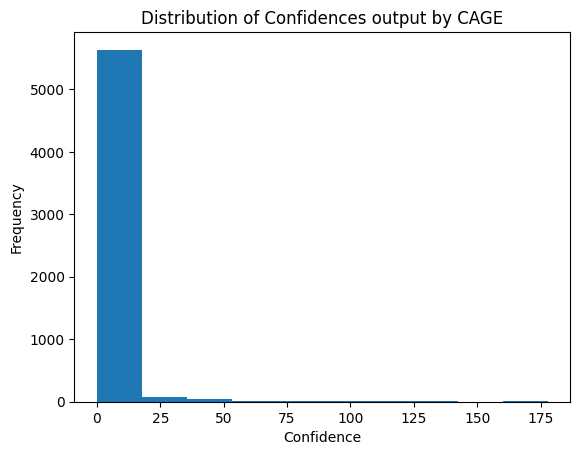

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Create a histogram of the data
plt.hist(confidence_list[0], bins=10)

# Set plot title and axis labels
plt.title('Distribution of Confidences output by CAGE')
plt.xlabel('Confidence')
plt.ylabel('Frequency')

# Show the plot
plt.show()